This note book will serve as a space to chceck the stellar types of WDs and check if they merge in a Hubble time
The steps to accomplishing this:
- reading in the file
- analyzing the stellar type distribution
- looking at just the WD+WD binaires and the combos that encompass this
- calcuate the coalescence time
- calculate the delay time
- calculate if the binary merges within a hubble time

In [1]:
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
from useful_fncs import tgw,WD_BINARY_BOOLS

### Reading in the h5 file

In [2]:
# reading in the HDF5 file - this file is the AIS file that we should expect many WDs in
pathToWDWD_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_wWeights_NEW.h5' #path of the hdf5 file

Data_WD = h5.File(pathToWDWD_H5 )

In [3]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
WD_SYS = pd.DataFrame() # making a pandas dataframe

for key in Data_WD["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    WD_SYS[key] = Data_WD["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [4]:
WD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,5842.090900,0,1.0,5.039797
1,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,9,1,1,1,0.0,86.103080,0,1.0,0.674882
2,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,1,1,1,0.0,13717.376578,0,1.0,9.758861
3,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,3290.631337,0,1.0,0.172821
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,4318.463259,0,1.0,0.216670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,1411.164121,0,1.0,0.273067
99996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,354.066004,0,1.0,0.118433
99997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,587.286296,0,1.0,0.137214
99998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,11942.559794,0,1.0,1.299077


#### Let's look at the stellar type distribution to see if we do actually get WDs

In [5]:
# # let's look and see the range of stellar types

# hist, bin_edges = np.histogram(WD_SYS['Stellar_Type(1)'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.hist(WD_SYS["Stellar_Type(1)"])
# plt.xlabel("Stellar Type of Star 1")

Text(0.5, 0, 'Stellar Type of Star 1')

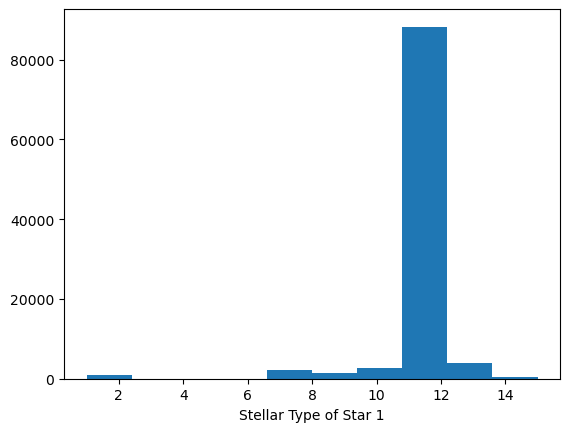

In [6]:
plt.hist(WD_SYS["Stellar_Type(1)"])
plt.xlabel("Stellar Type of Star 1")

Text(0.5, 0, 'Stellar Type of Star 2')

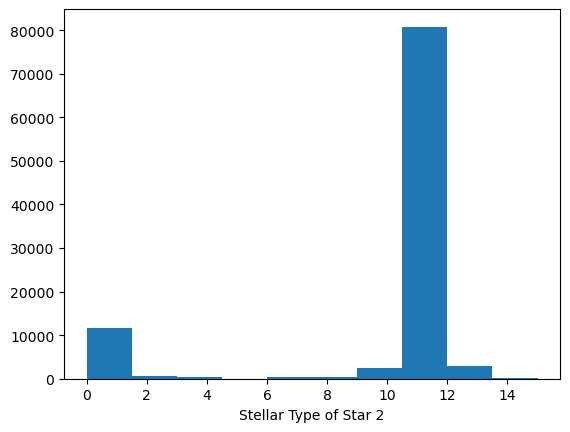

In [7]:
plt.hist(WD_SYS["Stellar_Type(2)"])
plt.xlabel("Stellar Type of Star 2")

These stellar types make sense because since star 1 is less massive at ZAMS it seems to be less evloved on average than the primary star.

#### Below is the function to find what the different combinations of WDs exist in this output of the simulation

In [8]:
def WD_BINARY_BOOLS(dataframe):

# let's first look at if there are only helium white dwarf WD binaries
    HeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==10)
# then carbon oxygen WD
    COWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==11)
# then oxgen neon WD
    ONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==12)

# let's look at the combination of WD binaries

# Helium WD combos
    HeCOWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==11)
    HeONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==12)

# Carbon Oxygen WD combos
    COHeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==10)
    COONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==12)

# Oxygen Neon WD combos
    ONeHeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==10)
    ONeCOWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==11)

    # let's return all of these bools
    return(HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool)


In [9]:
# let's now create a dataframe where the above criteria is met based on all of the bools

WDWD_SYS = WD_SYS.loc[(WD_BINARY_BOOLS(WD_SYS)[0])|(WD_BINARY_BOOLS(WD_SYS)[1])|(WD_BINARY_BOOLS(WD_SYS)[2])|(WD_BINARY_BOOLS(WD_SYS)[3])|(WD_BINARY_BOOLS(WD_SYS)[4])|(WD_BINARY_BOOLS(WD_SYS)[5])|(WD_BINARY_BOOLS(WD_SYS)[6])|(WD_BINARY_BOOLS(WD_SYS)[7])|(WD_BINARY_BOOLS(WD_SYS)[8])]
WDWD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,5842.090900,0,1.0,5.039797
3,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,3290.631337,0,1.0,0.172821
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,4318.463259,0,1.0,0.216670
6,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,764.414536,0,1.0,0.228002
8,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,1205.345463,0,1.0,0.206714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,1411.164121,0,1.0,0.273067
99996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,354.066004,0,1.0,0.118433
99997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,587.286296,0,1.0,0.137214
99998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,30.0,11,11,1,1,0.0,11942.559794,0,1.0,1.299077


As we can tell by the length of this table (850000) most of these systems were WD+WD

#### Let's now calcualte the coalescence time of these WD+WD

In [10]:
def tgw(a,e,Mmoremass,Mlessmass,Data,key,parameter):

    """
    Calcualte the coalescence time (inspiral time)
    a = semi major axis (expected in AU or Rsun)
    e = eccentricity
    Mmoremass = mass of the more massive compact object (expected in solar masses!)
    Mlessmass = mass of the less massive compact object (expected in solar masses!)
    """

    SYS = Data[key]
    sep_unit = SYS[parameter].attrs['units']
    if sep_unit == b'Rsol':
        a = (a * u.Rsun).to(u.m)

    elif sep_unit == b'AU':
        a = (a * u.AU).to(u.m)      

    Mmoremass = (Mmoremass * u.Msun).to(u.kg)
    Mlessmass = (Mlessmass * u.Msun).to(u.kg)

    tc = ((((5*((a)**4)*(const.c**5))/(256*(const.G**3)*(Mmoremass)*(Mlessmass)*((Mmoremass)+(Mlessmass))))*(1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

    return tc.values

In [11]:
# let's first look at the units of some parameters to see if anything must be converted
SPs_WD = Data_WD['BSE_System_Parameters']
print(SPs_WD['Mass(1)'].attrs['units']) 
print(SPs_WD['SemiMajorAxis'].attrs['units'])
print(SPs_WD['Time'].attrs['units'])

b'Msol'
b'Rsol'
b'Myr'


In [12]:
# Add columns for the more and less massive compact object

WDWD_SYS['M_moremass'] = WDWD_SYS[['Mass(1)', 'Mass(2)']].max(axis=1)
WDWD_SYS['M_lessmass'] = WDWD_SYS[['Mass(1)', 'Mass(2)']].min(axis=1)

/tmp/ipykernel_1674024/2059908841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS['M_moremass'] = WDWD_SYS[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_1674024/2059908841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS['M_lessmass'] = WDWD_SYS[['Mass(1)', 'Mass(2)']].min(axis=1)


In [13]:
time_col_wd = tgw((WDWD_SYS['SemiMajorAxis'].values),(WDWD_SYS['Eccentricity']),(WDWD_SYS['M_moremass'].values),(WDWD_SYS['M_lessmass'].values),Data_WD,'BSE_System_Parameters','SemiMajorAxis')

Let's add the coalescence time as a column to the dataframe

In [14]:
WDWD_SYS['Coalescence_Time'] = time_col_wd

/tmp/ipykernel_1674024/3833214828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS['Coalescence_Time'] = time_col_wd


In [15]:
WDWD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,M_moremass,M_lessmass,Coalescence_Time
0,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,1,1,0.0,5842.090900,0,1.0,5.039797,0.638226,0.614185,3.761352e+23
3,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,1,1,0.0,3290.631337,0,1.0,0.172821,1.065271,0.670867,1.276658e+21
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,1,1,0.0,4318.463259,0,1.0,0.216670,1.066278,0.641769,1.185820e+18
6,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,1,1,0.0,764.414536,0,1.0,0.228002,0.733475,0.726286,8.181037e+17
8,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,1,1,0.0,1205.345463,0,1.0,0.206714,0.800165,0.629663,7.170428e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,1,1,0.0,1411.164121,0,1.0,0.273067,0.877053,0.788728,1.764900e+16
99996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,1,1,0.0,354.066004,0,1.0,0.118433,1.106444,1.097736,2.060422e+18
99997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,1,1,0.0,587.286296,0,1.0,0.137214,0.824877,0.781691,5.543663e+20
99998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,...,1,1,0.0,11942.559794,0,1.0,1.299077,0.814940,0.551306,1.032296e+16


In [18]:
# in case you run the cell above more than once here is a way to remove the extra column
# WDWD_SYS = WDWD_SYS.drop('Coalescence Time', axis=1)

Let's rename the Merger column so that it is more reflective of what the flag is catching...a stellar merger

In [16]:
WDWD_SYS.columns = WDWD_SYS.columns.str.replace('Merger', 'Merger due to Mass Transfer')

Let's now calculate the time delay!

In [17]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time = np.array(WDWD_SYS['Time'])
t_col = np.array(WDWD_SYS['Coalescence_Time'])

t_delay = [] # this will hold the delay time in Myr

for binaries in range(WDWD_SYS.shape[0]):

    delay = time[binaries] + t_col[binaries] # adding the two values together to get the delay time
    t_delay.append(delay)


In [18]:
WDWD_SYS['Delay Time'] = t_delay

/tmp/ipykernel_1674024/2862924309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS['Delay Time'] = t_delay


In [19]:
# in case you need to remove the column
# WDWD_SYS = WDWD_SYS.drop('Delay Time', axis=1)

Let's now make a flag to see if there are WD+WD binaries where there is a merger (not just a stellar merger but due to gravitational waves) within hubble time

In [20]:
# first let's take the delay time column and make it a numpy array
delay_time = np.array(WDWD_SYS['Delay Time'])

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

hubble_merger = []

for times in delay_time:

    if (times > age_universe):
        hubble_merger.append(0)

    elif (times < age_universe):
        hubble_merger.append(1)


In [21]:
WDWD_SYS['Merger due to GW'] = hubble_merger

/tmp/ipykernel_1674024/2795056436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS['Merger due to GW'] = hubble_merger


In [22]:
# in case you need to remove the column
# WDWD_SYS = WDWD_SYS.drop('Merger due to GW', axis=1)

#### Let's make a lifetime distirbution of these systems

10.136720567156408


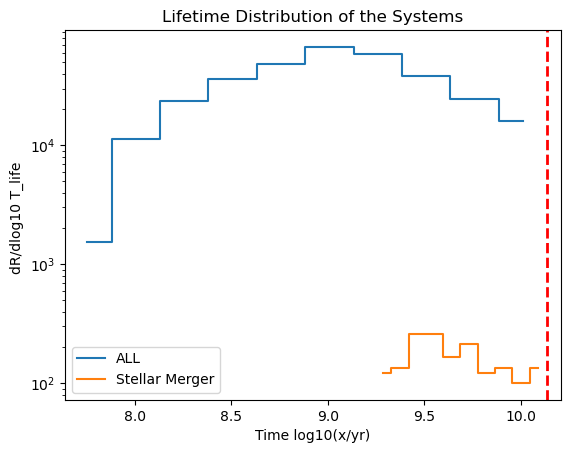

In [28]:
# first let's just look at the lifetime disitbutions
time_log_yr = np.log10(WDWD_SYS['Time'] *1e6  )

# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(time_log_yr)#, bins = np.linspace(9, 11, 50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.step(center_bins,hist/bin_width,where='mid',label='ALL')


stellar_merger_wdwd = WDWD_SYS.loc[WDWD_SYS['Merger due to Mass Transfer']==True]
stellar_merger_time_log_yr = np.log10(stellar_merger_wdwd['Time'] *1e6  )

hist, bin_edges = np.histogram(stellar_merger_time_log_yr)#, bins = np.linspace(9, 11, 50))
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.step(center_bins,hist/bin_width,where='mid',label='Stellar Merger')

###### 
#plotvalues
plt.xlabel("Time log10(x/yr)")
plt.yscale('log')

plt.ylabel("dR/dlog10 T_life ")
plt.title("Lifetime Distribution of the Systems")

# # the age of the universe
age_universe = (13.7 * 1e9) # converting from yr to Myr
print(np.log10(13.7 *1e9) )
# plt.xlim(9, 11)
plt.axvline(np.log10(age_universe), color='r', linestyle='--', linewidth=2)
plt.legend()


In [29]:
# let's check to see if there are any binaries who did merge before hubble time

pd.set_option('display.max_columns', None) # allows us to see all of the columns
display(WDWD_SYS[WDWD_SYS["Merger due to GW"]==1])

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger due to Mass Transfer,Merger due to Mass Transfer_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,M_moremass,M_lessmass,Coalescence_Time,Delay Time,Merger due to GW
14,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5-8 ',0.571620,0.673707,3.759247,2.496308,0,0,0.021682,0.021682,0.0,0.0,0,1,14,0.921893,0.773165,4.141153,5.469058,-1.391145,-0.640291,0.936227,6.016802,2.232218,0.081812,265.0,265.0,30.0,30.0,11,11,1,1,0.0,405.370186,0,1.0,1.578707,0.673707,0.571620,7781.577103,8186.947288,1
31,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2-8 ',b'5-8 ',0.773915,0.674927,5.321437,2.535452,0,0,0.004714,0.004714,0.0,0.0,0,1,31,0.028992,0.958106,2.025278,4.840019,1.341119,-0.315357,4.061598,0.860275,1.621585,0.172910,265.0,265.0,30.0,30.0,11,11,1,1,0.0,494.155681,0,1.0,0.309698,0.773915,0.674927,1373.314685,1867.470366,1
40,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'1-2 ',b'3 ',0.128751,0.345038,1.056363,0.836216,0,0,0.001365,0.001365,0.0,0.0,0,1,40,0.644008,0.055366,0.704790,4.954511,-0.439392,0.173293,0.911352,1.909537,0.307706,0.014454,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4992.556501,0,1.0,9.999993,0.345038,0.128751,64.020795,5056.577296,1
52,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'3 ',b'6 ',0.312582,0.549920,1.342096,1.211404,0,0,0.000292,0.000292,0.0,0.0,0,1,52,0.823374,0.026118,0.918938,1.324311,0.239116,0.273836,5.201502,3.896400,0.692827,0.181955,265.0,265.0,30.0,30.0,10,11,1,1,0.0,3276.834166,0,1.0,9.371884,0.549920,0.312582,233.593141,3510.427307,1
114,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'1-2 ',b'3 ',0.155492,0.353392,1.009260,0.782078,0,0,0.000230,0.000230,0.0,0.0,0,1,114,0.126419,0.868745,4.975159,5.817499,-0.023176,-1.376458,0.185541,2.273397,0.480138,0.019013,265.0,265.0,30.0,30.0,10,10,1,1,0.0,7039.419315,0,1.0,9.999954,0.353392,0.155492,285.668079,7325.087394,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99883,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'6 ',b'3 ',1.328178,0.293608,6.224975,1.567545,0,0,0.001031,0.001031,0.0,0.0,0,1,99883,0.655379,0.897873,4.170324,5.282087,-0.654811,0.367726,3.527144,1.630363,1.593854,4.274133,265.0,265.0,30.0,30.0,12,10,1,1,0.0,1591.331097,0,1.0,0.623121,1.328178,0.293608,1533.766025,3125.097122,1
99900,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'5 ',b'3 ',0.587863,0.313331,2.532480,2.087098,0,0,0.023187,0.023187,0.0,0.0,0,1,99900,0.950791,0.821404,0.237795,5.655914,-0.318792,-0.379973,0.011547,0.841951,0.788408,2.025903,265.0,265.0,30.0,30.0,11,11,1,1,0.0,2223.960578,0,1.0,0.203871,0.587863,0.313331,349.856371,2573.816949,1
99917,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'5 ',b'3 ',0.672699,0.305973,2.849890,1.913630,0,0,0.011928,0.011928,0.0,0.0,0,1,99917,0.944094,0.569482,3.964786,5.709037,0.340193,0.037240,4.560689,2.963702,1.077492,2.259127,265.0,265.0,30.0,30.0,11,10,1,1,0.0,1245.184712,0,1.0,0.559022,0.672699,0.305973,1005.769001,2250.953713,1
99943,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,15,0,1.5,b'2 ',b'5 ',0.593881,0.608892,3.809298,1.819042,0

In [27]:
Data_WD.close()

### Let's do these same steps but with the larger COMPAS output

In [5]:
# reading in the HDF5 file - this file is the AIS file that we should expect many WDs in
pathToWDWD_LG_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_LG_1e8.h5' #path of the hdf5 file

Data_WD_LG = h5.File(pathToWDWD_LG_H5)

In [7]:
# so that we can read this hdf5 file in as a pnadas dataframe, let's ply choose columns we know we will want
keys_of_interest = ['CE_Event_Counter','Eccentricity','Mass(1)','Mass(2)','Mass@ZAMS(1)','Metallicity@ZAMS(1)','SEED','SemiMajorAxis',\
                        'Stellar_Type(1)','Stellar_Type(2)','Time']
# keys_of_interest = ['CE_Event_Counter','Eccentricity','Immediate_RLOF>CE','MT_Donor_Hist(1)','MT_Donor_Hist(2)',\
#                     'Mass(1)','Mass(2)','Metallicity@ZAMS(1)','Optimistic_CE','Record_Type','SEED','SemiMajorAxis',\
#                         'Stellar_Type(1)','Stellar_Type(2)','Time']

In [8]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
WD_SYS_LG = pd.DataFrame() # making a pandas dataframe

for key in keys_of_interest: #looping through the "keys" or paramters in BSE_System_Parameters

    read_data = Data_WD_LG["BSE_System_Parameters"][key][()]

    WD_SYS_LG[key] = read_data # adding these columns to the dataframe

In [9]:
WD_SYS_LG

,CE_Event_Counter,Eccentricity,Mass(1),Mass(2),Mass@ZAMS(1),Metallicity@ZAMS(1),SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time
0,0,0.000000,0.625663,0.761457,1.068700,0.000130,72000000,74727.054715,11,1,13745.958444
1,0,7579.116386,1.788165,0.604919,14.169186,0.002814,72000001,-1.412570,13,11,13741.150858
2,1,0.000000,1.281086,0.299036,1.281086,0.000246,72000002,5.576185,1,0,2602.927338
3,1,0.000000,2.586221,1.193061,2.586237,0.005572,72000003,8.863112,1,1,468.847412
4,1,0.000000,0.625919,0.663920,1.772690,0.000174,72000004,0.738981,10,11,13766.617474
...,...,...,...,...,...,...,...,...,...,...,...
99999995,0,0.000000,0.313241,0.772486,0.914427,0.000664,76999995,126.769670,10,1,13724.804030
99999996,0,784.141944,1.277584,1.113975,10.312084,0.000661,76999996,-15.316727,13,11,13988.700378
99999997,1,0.000000,0.354356,0.576027,1.630946,0.000275,76999997,1.812679,10,0,13709.269039
99999998,0,0.000000,0.788885,0.365871,1.822950,0.004309,76999998,11853.015233,11,0,14022.902066


In [12]:
# this is revelant for executing the slurm script
# the minumum mass@zams(1) = 0.7 M_sun
# the max mass@zams(1) = 150 M_sun
# min(WD_SYS_LG['Mass@ZAMS(1)'])
# max(WD_SYS_LG['Mass@ZAMS(1)'])

Let's look at the stellar type distribution of systems in this output

Text(0.5, 0, 'Stellar Type of Star 1')

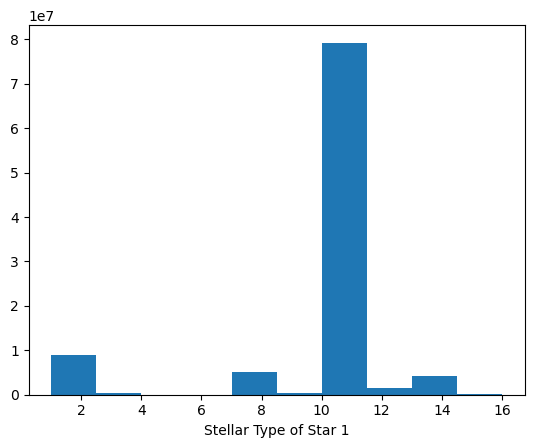

In [30]:
plt.hist(WD_SYS_LG["Stellar_Type(1)"])
plt.xlabel("Stellar Type of Star 1")

Text(0.5, 0, 'Stellar Type of Star 2')

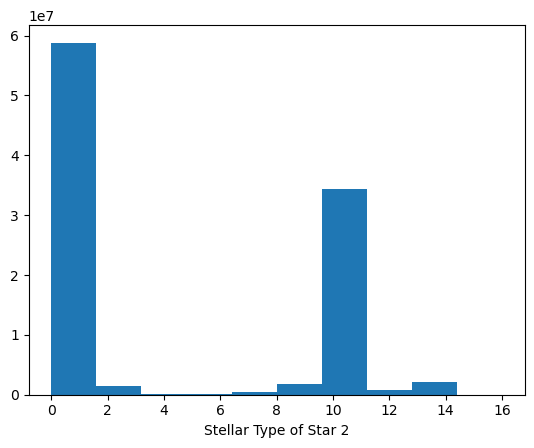

In [31]:
plt.hist(WD_SYS_LG["Stellar_Type(2)"])
plt.xlabel("Stellar Type of Star 2")

In [8]:
# let's now create a dataframe where the above criteria is met based on all of the bools

WDWD_SYS_LG = WD_SYS_LG.loc[(WD_BINARY_BOOLS(WD_SYS_LG)[0])|(WD_BINARY_BOOLS(WD_SYS_LG)[1])|(WD_BINARY_BOOLS(WD_SYS_LG)[2])|(WD_BINARY_BOOLS(WD_SYS_LG)[3])|(WD_BINARY_BOOLS(WD_SYS_LG)[4])|(WD_BINARY_BOOLS(WD_SYS_LG)[5])|(WD_BINARY_BOOLS(WD_SYS_LG)[6])|(WD_BINARY_BOOLS(WD_SYS_LG)[7])|(WD_BINARY_BOOLS(WD_SYS_LG)[8])]
WDWD_SYS_LG

,CE_Event_Counter,Eccentricity,Mass(1),Mass(2),Metallicity@ZAMS(1),SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time
4,1,0.0,0.625919,0.663920,0.000174,72000004,0.738981,10,11,13766.617474
6,0,0.0,0.662410,0.574726,0.025345,72000006,177967.184704,11,11,14151.798015
7,1,0.0,0.330091,0.307905,0.000343,72000007,1.233711,11,10,14048.738215
12,0,0.0,1.210560,1.158525,0.000207,72000012,16844.324810,11,11,13751.494687
13,0,0.0,1.226161,0.552078,0.012859,72000013,13097.737448,11,11,14072.662790
...,...,...,...,...,...,...,...,...,...,...
99999987,1,0.0,0.617492,0.587801,0.001178,76999987,0.686244,11,11,14080.009813
99999989,0,0.0,0.838496,0.587605,0.009934,76999989,210473.780636,11,11,13871.101828
99999990,0,0.0,0.661509,0.538082,0.001816,76999990,22741.747220,11,11,13892.517164
99999991,0,0.0,1.016332,0.524589,0.002750,76999991,223962.436392,11,11,13802.806920


#### Let's now calcualte the coalescence time of these WD+WD

In [9]:
# Add columns for the more and less massive compact object

WDWD_SYS_LG['M_moremass'] = WDWD_SYS_LG[['Mass(1)', 'Mass(2)']].max(axis=1)
WDWD_SYS_LG['M_lessmass'] = WDWD_SYS_LG[['Mass(1)', 'Mass(2)']].min(axis=1)

/tmp/ipykernel_1481656/1883858261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS_LG['M_moremass'] = WDWD_SYS_LG[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_1481656/1883858261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS_LG['M_lessmass'] = WDWD_SYS_LG[['Mass(1)', 'Mass(2)']].min(axis=1)


In [10]:
time_col_lg = tgw((WDWD_SYS_LG['SemiMajorAxis'].values),(WDWD_SYS_LG['Eccentricity']),(WDWD_SYS_LG['M_moremass'].values),(WDWD_SYS_LG['M_lessmass'].values))

In [11]:
WDWD_SYS_LG['Coalescence_Time'] = time_col_lg

/tmp/ipykernel_1481656/1321637061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS_LG['Coalescence_Time'] = time_col_lg


In [12]:
WDWD_SYS_LG

,CE_Event_Counter,Eccentricity,Mass(1),Mass(2),Metallicity@ZAMS(1),SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time,M_moremass,M_lessmass,Coalescence_Time
4,1,0.0,0.625919,0.663920,0.000174,72000004,0.738981,10,11,13766.617474,0.663920,0.625919,1.787970e+11
6,0,0.0,0.662410,0.574726,0.025345,72000006,177967.184704,11,11,14151.798015,0.662410,0.574726,6.844639e+32
7,1,0.0,0.330091,0.307905,0.000343,72000007,1.233711,11,10,14048.738215,0.330091,0.307905,1.148100e+13
12,0,0.0,1.210560,1.158525,0.000207,72000012,16844.324810,11,11,13751.494687,1.210560,1.158525,7.786437e+27
13,0,0.0,1.226161,0.552078,0.012859,72000013,13097.737448,11,11,14072.662790,1.226161,0.552078,7.856755e+27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999987,1,0.0,0.617492,0.587801,0.001178,76999987,0.686244,11,11,14080.009813,0.617492,0.587801,1.629132e+11
99999989,0,0.0,0.838496,0.587605,0.009934,76999989,210473.780636,11,11,13871.101828,0.838496,0.587605,8.975359e+32
99999990,0,0.0,0.661509,0.538082,0.001816,76999990,22741.747220,11,11,13892.517164,0.661509,0.538082,2.013144e+29
99999991,0,0.0,1.016332,0.524589,0.002750,76999991,223962.436392,11,11,13802.806920,1.016332,0.524589,9.841523e+32


In [13]:
WDWD_SYS_LG.columns = WDWD_SYS_LG.columns.str.replace('Merger', 'Merger_MT')

In [14]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg = np.array(WDWD_SYS_LG['Time'])
t_col_lg = np.array(WDWD_SYS_LG['Coalescence_Time'])

t_delay_lg = [] # this will hold the delay time in Myr

for binaries_lg in range(WDWD_SYS_LG.shape[0]):

    delay_lg = time_lg[binaries_lg] + t_col_lg[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg.append(delay_lg)


In [15]:
WDWD_SYS_LG['Delay_Time'] = t_delay_lg

/tmp/ipykernel_1481656/1733889850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_SYS_LG['Delay_Time'] = t_delay_lg


In [16]:
# first let's take the delay time column and make it a numpy array
delay_time_lg = np.array(WDWD_SYS_LG['Delay_Time'])

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

hubble_merger_lg = []

for times_lg in delay_time_lg:

    if (times_lg > age_universe):
        hubble_merger_lg.append(bool(0))

    elif (times_lg < age_universe):
        hubble_merger_lg.append(bool(1))


In [17]:
hubble_merger_array = np.array(hubble_merger_lg)

In [18]:
WDWD_SYS_LG.insert(13,"Merger_GW",hubble_merger_array,True)

In [19]:
WDWD_SYS_LG

,CE_Event_Counter,Eccentricity,Mass(1),Mass(2),Metallicity@ZAMS(1),SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time,M_moremass,M_lessmass,Coalescence_Time,Merger_GW,Delay_Time
4,1,0.0,0.625919,0.663920,0.000174,72000004,0.738981,10,11,13766.617474,0.663920,0.625919,1.787970e+11,False,1.787970e+11
6,0,0.0,0.662410,0.574726,0.025345,72000006,177967.184704,11,11,14151.798015,0.662410,0.574726,6.844639e+32,False,6.844639e+32
7,1,0.0,0.330091,0.307905,0.000343,72000007,1.233711,11,10,14048.738215,0.330091,0.307905,1.148100e+13,False,1.148100e+13
12,0,0.0,1.210560,1.158525,0.000207,72000012,16844.324810,11,11,13751.494687,1.210560,1.158525,7.786437e+27,False,7.786437e+27
13,0,0.0,1.226161,0.552078,0.012859,72000013,13097.737448,11,11,14072.662790,1.226161,0.552078,7.856755e+27,False,7.856755e+27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99999987,1,0.0,0.617492,0.587801,0.001178,76999987,0.686244,11,11,14080.009813,0.617492,0.587801,1.629132e+11,False,1.629132e+11
99999989,0,0.0,0.838496,0.587605,0.009934,76999989,210473.780636,11,11,13871.101828,0.838496,0.587605,8.975359e+32,False,8.975359e+32
99999990,0,0.0,0.661509,0.538082,0.001816,76999990,22741.747220,11,11,13892.517164,0.661509,0.538082,2.013144e+29,False,2.013144e+29
99999991,0,0.0,1.016332,0.524589,0.002750,76999991,223962.436392,11,11,13802.806920,1.016332,0.524589,9.841523e+32,False,9.841523e+32


In [23]:
# let's check to see if there are any binaries who did merge before hubble time
WDWD_SYS_LG_MERGE = WDWD_SYS_LG[WDWD_SYS_LG["Merger_GW"]==1]
WDWD_SYS_LG_MERGE

,CE_Event_Counter,Eccentricity,Mass(1),Mass(2),Metallicity@ZAMS(1),SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time,M_moremass,M_lessmass,Coalescence_Time,Merger_GW,Delay_Time
280941,1,0.0,0.193598,0.182791,0.006354,72280941,0.004284,10,10,4216.255600,0.193598,0.182791,8126.886826,True,12343.142426
373851,1,0.0,0.184772,0.176549,0.005652,72373851,0.003944,10,10,4807.189548,0.184772,0.176549,6597.508999,True,11404.698546
408315,1,0.0,0.197984,0.192649,0.006608,72408315,0.004167,10,10,3220.805493,0.197984,0.192649,6505.600437,True,9726.405930
561045,1,0.0,0.212508,0.211000,0.005372,72561045,0.004763,10,10,2447.323101,0.212508,0.211000,8713.017584,True,11160.340684
597937,1,0.0,0.183311,0.173089,0.007262,72597937,0.004035,10,10,5399.837695,0.183311,0.173089,7531.680041,True,12931.517736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99409106,1,0.0,0.208772,0.185347,0.008826,76409106,0.004313,10,10,3141.208584,0.208772,0.185347,7292.582462,True,10433.791046
99417427,1,0.0,0.185106,0.179842,0.008087,76417427,0.004227,10,10,4870.442489,0.185106,0.179842,8444.024403,True,13314.466892
99475588,1,0.0,0.212298,0.189092,0.006483,76475588,0.003982,10,10,2635.677447,0.212298,0.189092,5013.043992,True,7648.721439
99545184,1,0.0,0.168073,0.162954,0.009676,76545184,0.003538,10,10,7022.935863,0.168073,0.162954,5556.825708,True,12579.761571


There are 771 WD+WD systems that seem to merger within a hubble time!

Let's look at the types of systems these are

Text(0, 0.5, 'Stellar Type of Star 2')

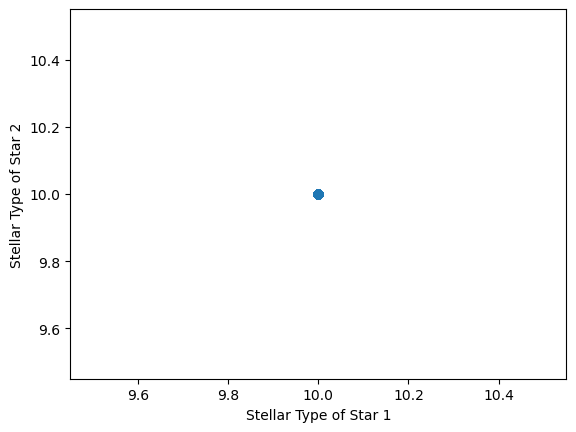

In [26]:
plt.scatter(WDWD_SYS_LG_MERGE["Stellar_Type(1)"],WDWD_SYS_LG_MERGE['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Star 1")
plt.ylabel("Stellar Type of Star 2")

In [27]:
hewd_bool = np.logical_and(WDWD_SYS_LG_MERGE["Stellar_Type(1)"]==10,WDWD_SYS_LG_MERGE["Stellar_Type(2)"]==10)
sum(hewd_bool)

771

All of the systems that merged within a hubble time were helium WD + helium WD